In [ ]:
#!pip install keras==2.8.0
#!pip install tensorflow==2.8.0

In [1]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.14.0
Keras version: 2.14.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install tensorflow-gpu==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.3 MB/s eta 0:00:00


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.4
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blis                             0.7.9


In [3]:
import tensorflow as tf
import os

In [4]:
os.path.join('data','no')

'data/no'

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import PIL

In [6]:
data_dir = '/content/drive/MyDrive/data'

In [7]:
os.listdir(data_dir)

['yes', 'no']

In [8]:
img_exts = ['jpeg','jpg','bmp','png','JPG']

In [9]:
img_no = cv2.imread(os.path.join(data_dir,'no','No18.jpg'))
img_yes = cv2.imread(os.path.join(data_dir,'yes','Y255.JPG'))

In [ ]:
type(img_no)

numpy.ndarray

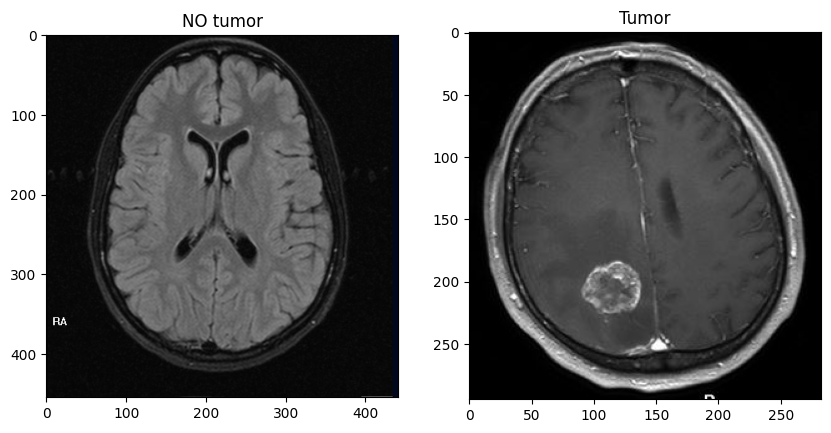

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_no,cv2.COLOR_BGR2RGB))
plt.title('NO tumor')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_yes,cv2.COLOR_BGR2RGB))
plt.title('Tumor')
plt.show()

In [ ]:
img_no.shape

(454, 442, 3)

In [11]:
for image_class in os.listdir(data_dir):
      for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

Y161.JPG
Y195.JPG
Y17.jpg
Y23.JPG
Y14.jpg
Y148.JPG
Y154.jpg
Y166.JPG
Y24.jpg
Y160.JPG
Y16.JPG
Y117.JPG
Y21.jpg
Y101.jpg
Y10.jpg
Y183.jpg
Y18.JPG
Y159.JPG
Y112.JPG
Y107.jpg
Y156.JPG
Y162.jpg
Y169.jpg
Y192.JPG
Y2.jpg
Y20.jpg
Y193.JPG
Y115.JPG
Y155.JPG
Y167.JPG
Y188.jpg
Y170.JPG
Y158.JPG
Y163.JPG
Y120.JPG
Y181.jpg
Y153.jpg
Y114.JPG
Y184.JPG
Y187.jpg
Y194.jpg
Y180.jpg
Y106.jpg
Y11.jpg
Y13.jpg
Y146.JPG
Y100.JPG
Y111.JPG
Y103.jpg
Y185.jpg
Y186.jpg
Y164.JPG
Y113.JPG
Y19.JPG
Y147.JPG
Y15.jpg
Y168.jpg
Y104.jpg
Y182.JPG
Y108.jpg
Y109.JPG
Y12.jpg
Y116.JPG
Y105.jpg
Y165.JPG
Y1.jpg
Y157.JPG
Y102.jpg
Y22.jpg
Y9.jpg
Y255.JPG
Y244.JPG
Y60.jpg
Y243.JPG
Y62.jpg
Y51.jpg
Y245.jpg
Y45.JPG
Y73.jpg
Y78.jpg
Y252.jpg
Y33.jpg
Y92.jpg
Y50.JPG
Y256.JPG
Y248.JPG
Y99.JPG
Y96.jpg
Y55.jpg
Y39.jpg
Y44.JPG
Y65.JPG
Y47.JPG
Y258.JPG
Y247.JPG
Y81.jpg
Y70.jpg
Y91.jpg
Y37.jpg
Y41.jpg
Y69.jpg
Y250.jpg
Y251.JPG
Y95.jpg
Y29.jpg
Y86.JPG
Y40.JPG
Y257.jpg
Y56.jpg
Y85.JPG
Y90.jpg
Y254.jpg
Y35.jpg
Y49.JPG
Y249.JPG
Y76.jpg
Y34.jpg
Y

In [12]:
print('Tumor images')
print(len(os.listdir('/content/drive/MyDrive/data/yes')))
print('No tumor images')
print(len(os.listdir('/content/drive/MyDrive/data/no')))

Tumor images
154
No tumor images
96


In [13]:
image_path = os.path.join(data_dir, image_class, image)
image_path

'/content/drive/MyDrive/data/no/20 no.jpg'

In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Data Augmentation

In [79]:
# img augmentation for no Tumor images
img_aug = cv2.imread(os.path.join(data_dir,'yes','Y41.jpg'))
img_aug = cv2.cvtColor(img_aug, cv2.COLOR_BGR2RGB)

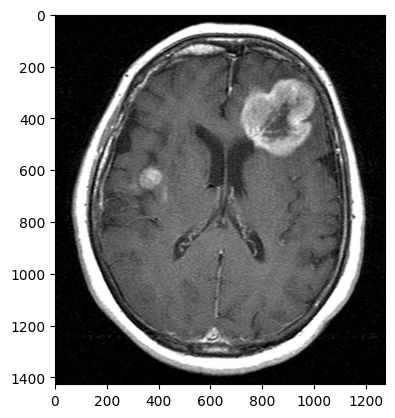

In [80]:
plt.imshow(img_aug)

In [34]:
img_aug.shape

(400, 393, 3)

In [ ]:
# doing data augmentation multiple times in different images

doing data augmentation multiple times in different images


In [35]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [81]:
img_aug = img_aug.reshape((1,) + img_aug.shape)  # this is a Numpy array with shape (1, *, *, *)

img_aug.shape

(1, 1427, 1275, 3)

In [82]:
i = 0
for batch in datagen.flow(img_aug, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/data/yes', save_prefix='yes_t', save_format='jpg'):
    i += 1
    if i > 50:
        break

In [83]:
print('Tumor images')
print(len(os.listdir('/content/drive/MyDrive/data/yes')))
print('No tumor images')
print(len(os.listdir('/content/drive/MyDrive/data/no')))

Tumor images
307
No tumor images
302


In [84]:
import numpy as np

In [85]:
data = tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=16)

Found 609 files belonging to 2 classes.


In [86]:
data_iterator = data.as_numpy_iterator()

In [87]:
batch = data_iterator.next()

In [88]:
len(batch)

2

In [89]:
len(batch[0])

16

In [ ]:
batch[0].shape

(16, 256, 256, 3)

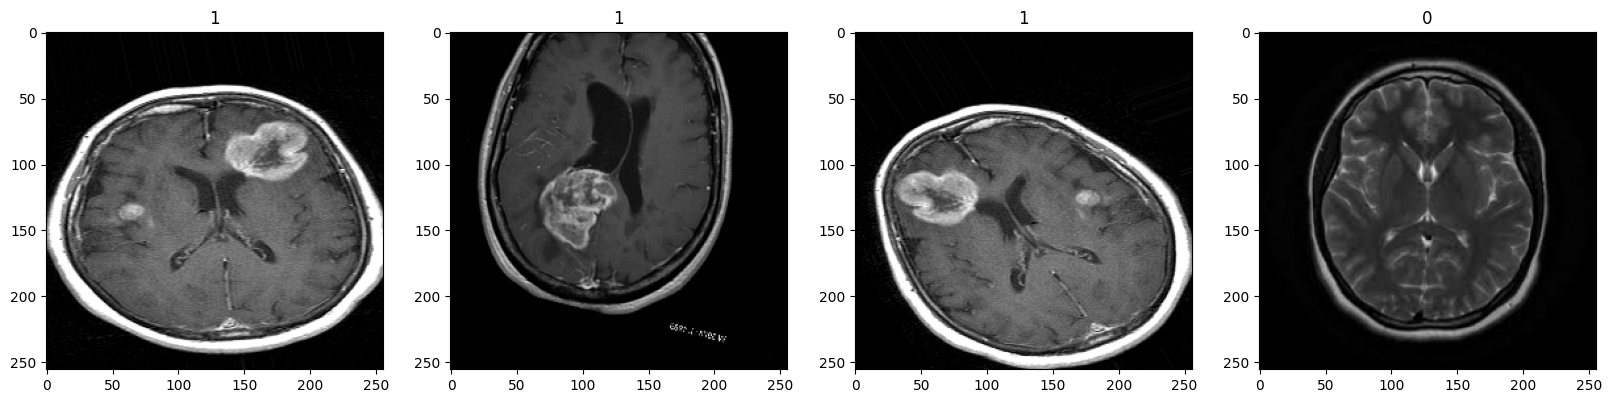

In [90]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale Our Data

In [91]:
data = data.map(lambda x,y: (x/255, y))

In [92]:
batch = data.as_numpy_iterator().next()
batch[0].max()

1.0

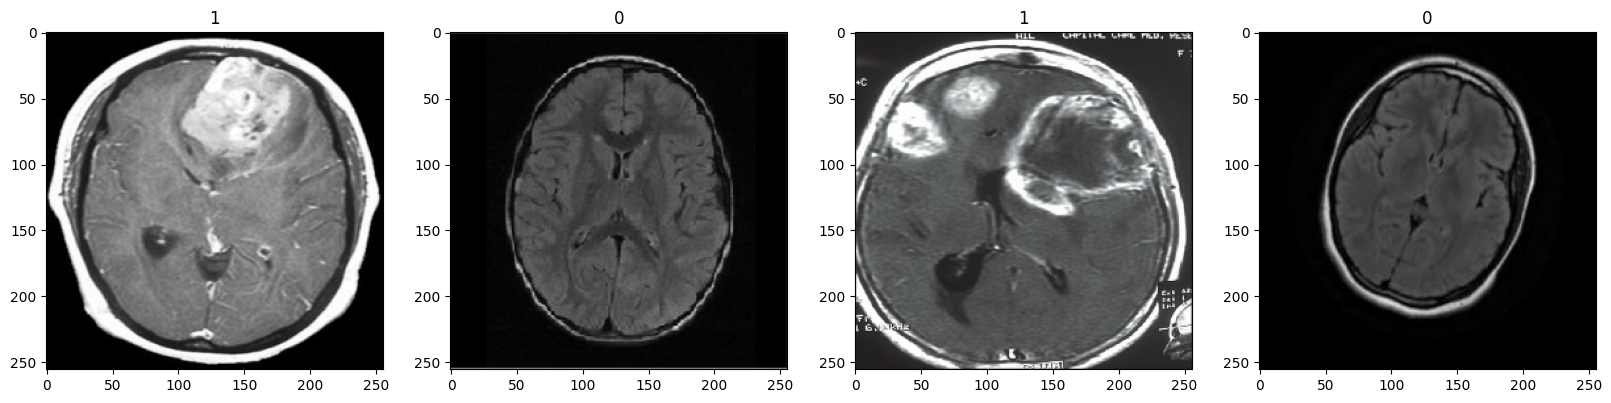

In [93]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [94]:
len(data)

39

In [95]:
#Spliting the data

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [96]:
train_size

27

In [97]:
val_size

7

In [98]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [99]:
len(train)

27

In [100]:
len(test)

3

In [102]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [117]:
model = Sequential()
model.add(Conv2D(16, (3, 3), 1 ,input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), 1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [118]:
tf.optimizers.Adam

keras.src.optimizers.adam.Adam

In [119]:
model.compile(optimizer='Adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [120]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 activation_4 (Activation)   (None, 254, 254, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 activation_5 (Activation)   (None, 125, 125, 16)      0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                 

In [107]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [121]:
class myCallback(tf.keras.callbacks.Callback):
		def on_epoch_end(self, epoch, logs={} ) :
			if (logs.get('loss') < 0.055 ) :
					print(" \n loss is low so cancelling training ! ")
					self.model.stop_training = True

callbacks = myCallback()

We can use a callback to control the training LOSS

In [122]:
hist= model.fit(train,epochs=10,validation_data=val, callbacks=[callbacks])

Epoch 1/10
27/27 [==============================] - 7s 177ms/step - loss: 0.7328 - accuracy: 0.6157 - val_loss: 0.6001 - val_accuracy: 0.6875
Epoch 2/10
27/27 [==============================] - 3s 117ms/step - loss: 0.5515 - accuracy: 0.7361 - val_loss: 0.5600 - val_accuracy: 0.7321
Epoch 3/10
27/27 [==============================] - 4s 151ms/step - loss: 0.4216 - accuracy: 0.8102 - val_loss: 0.3617 - val_accuracy: 0.8571
Epoch 4/10
27/27 [==============================] - 5s 173ms/step - loss: 0.2792 - accuracy: 0.9097 - val_loss: 0.3020 - val_accuracy: 0.9018
Epoch 5/10
27/27 [==============================] - 4s 123ms/step - loss: 0.1733 - accuracy: 0.9583 - val_loss: 0.1753 - val_accuracy: 0.9286
Epoch 6/10
27/27 [==============================] - 3s 116ms/step - loss: 0.0850 - accuracy: 0.9884 - val_loss: 0.3139 - val_accuracy: 0.9107
Epoch 7/10
27/27 [==============================] - 4s 155ms/step - loss: 0.0751 - accuracy: 0.9838 - val_loss: 0.1563 - val_accuracy: 0.9286
Epoch 

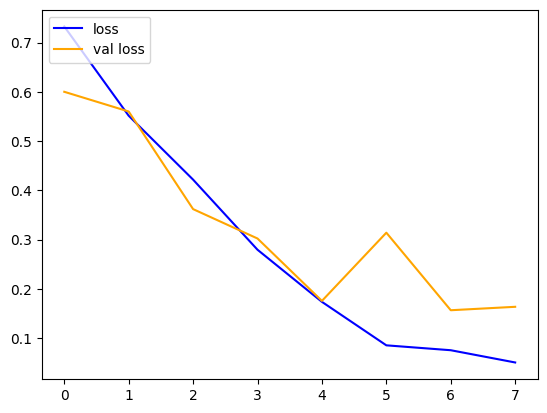

In [123]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val loss')
plt.legend(loc='upper left')
plt.show()

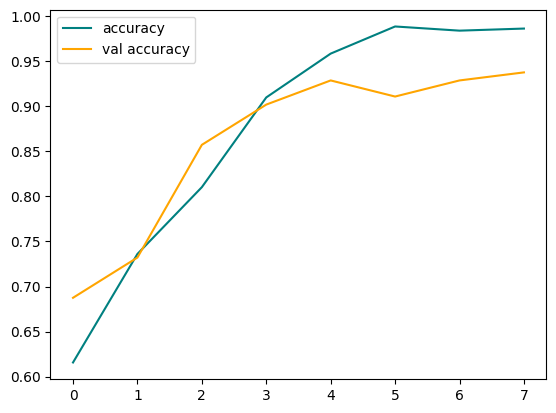

In [124]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='Teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val accuracy')
plt.legend(loc='upper left')
plt.show()

In [125]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [126]:
pre = Precision()
re = Recall()
acc =BinaryAccuracy()

In [127]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 33ms/step


In [128]:
print("Precision",pre.result().numpy())
print("Recall",re.result().numpy())
print("Accuracy",acc.result().numpy())

Precision 0.96153843
Recall 0.9259259
Accuracy 0.9375


Test On unseen data

In [140]:
img_test = cv2.imread('/content/drive/MyDrive/data/yes_test.jpg')

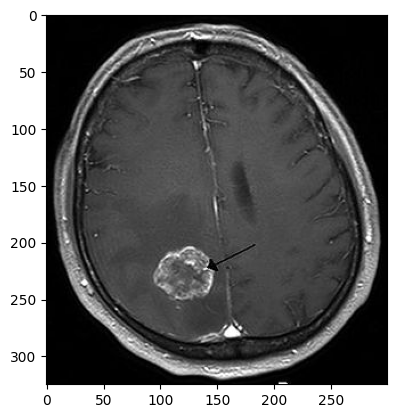

In [141]:
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
plt.imshow(img_test)

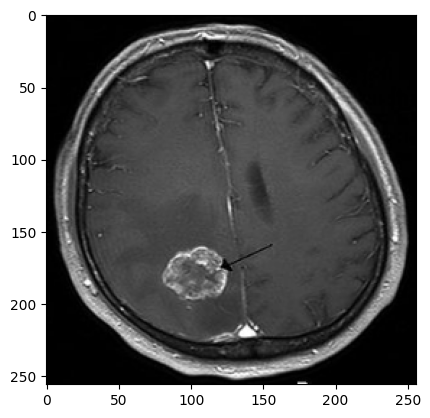

In [142]:
resize = tf.image.resize(img_test,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [143]:
resize.shape

TensorShape([256, 256, 3])

In [144]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [145]:
yhat = model.predict(np.expand_dims(resize/255,0))
if yhat < 0.5:
  print(" There is no tumor in the brain ")

else:
  print("There is Tumor in the brain")

print(yhat)

1/1 [==============================] - 0s 74ms/step
There is Tumor in the brain
[[0.9999902]]
